# Clustering - K-means



## Import libraries
---

In [56]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data
import numpy as np

# Load and prepare data
Read the `iris.csv` file in variable `df`. Keep all features in variable `df` and store the class variable in `species`. Also, standardize the data so each variable has a mean of zero and unit variance (i.e., variance and standard deviation of one).

In [57]:
# Reads the .csv file into variable df
df = pd.read_csv('iris.csv')

#Separates the class variable in the species column
species = df.species

#Removes the species column from df
df = df.drop('species', axis=1)

#Standardizes df
df = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns=df.columns)

# Displays the first 5 rows of df
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [58]:
species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

This shows that there a 3 unique species of Irises according to the dataset but it's important to do a k-means plot to see if this is right for clustering/grouping and if it needs adjusting. 

## Running k-means
---

### k-Means: Train the Model
We'll set up a `KMeans` object with the following parameters:

- `n_clusters`: Total number of clusters to make.
- `random_state`: Set to one to reproduce these results.
- `init`: How to initialize the k-means centers; we'll use `k-means++`.
- `n_init`: Number of times k-means would be run; the model returned would have the minimum value of `inertia`.

A few attributes of the `KMeans` object, which are also used in this demo are:
- `cluster_centers_`: Stores the discovered cluster centers.
- `labels_`: Label of each instance.
- `inertia`: Sum of square of distances of each instance from its corresponding center.
- `n_iter`: Number of iterations run to find the centers.

In [59]:
# Sets up the kMeans object
km = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10)

# Fits the model to the data
km.fit(df)

# Displays the parameters of the fitted model
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

Choose 3 clusters here given what we know about the number of unique species from the dataset

### k-Means: Visualize the Clusters

The code below creates a scatterplot of the first two features. Each point is colored according to its actual label. For comparison, each instance is drawn with a marker according to the label found by the clustering algorithm.

In [60]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

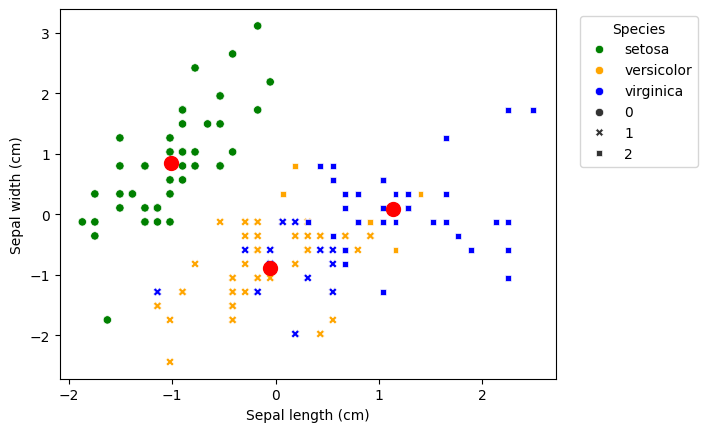

In [61]:
# Creates a scatter plot
sns.scatterplot(
    x='sepal_length', 
    y='sepal_width',
    data=df, 
    hue=species,
    style=km.labels_,
    palette=["green", "orange", "blue"])
# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='o',
    s=100,
    c='red')

# Adds labels to the axes
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

plt.legend(
    title='Species',
    bbox_to_anchor=(1.3, 1.0))


This set up the Initial scatter plot with the Iris Flowers data and from my initial thoughts, we can see the Setosa cluster identified effective with its center. However for Setosa and Versicolor, it's not as clear with the data points blurring between them. This makes it difficult to identify the clusters here, which is why we should find the optimal number of clusters. Perhaps three clusters wasn't the right number so let's have a look at what could be a better number of clusters

## k-means: Optimize via silhouette scores
---
The main challenge in k-means is to find the optimal number of clusters. We can set up a `GridSearchCV` object to search for the optimal parameters. For k-Mmeans, we require a custom scorer that computes the silhouette value for different number of clusters specified by `n_clusters`. The custom scorer is called `s2()` in the code below, where it uses `silhouette_score()` from the `sklearn.metrics` library to compute a score for an instance `X`. 

A silhouette score is a value in [-1,+1]. It is a means for comparing how similar an instance is to its corresponding cluster compared to its similarity with other clusters. Formally, it takes into account `cohesion` and `separation` to compute a silhouette value. A +1 or close to this score value indicates better clusters.

In [62]:
# Sets up the custom scorer
def s2(estimator,X):
    return silhouette_score(X, estimator.predict(X))

# List of values for the parameter `n_clusters`
param = range(2,11)

# KMeans object
km = KMeans(random_state=0, init='k-means++')

# Sets up GridSearchCV object and stores in grid variable
grid = GridSearchCV(
    km,
    {'n_clusters': param},
    scoring=s2,
    cv=2)

# Fits the grid object to data
grid.fit(df)

# Accesses the optimum model
best_km = grid.best_estimator_

# Displays the optimum model
best_km.get_params()

/Users/denisechan/Documents/Makers/Data_Engineering/Week_2/Challenge/stats_challenge_5/stats-challenge-5/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/denisechan/Documents/Makers/Data_Engineering/Week_2/Challenge/stats_challenge_5/stats-challenge-5/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/denisechan/Documents/Makers/Data_Engineering/Week_2/Challenge/stats_challenge_5/stats-challenge-5/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters w

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

From this output, it seems 4 clusters would be the optimal number

## Plot of Scores for Different Number of Clusters
The `grid` object has an attribute `cv_results_` through which the scores for different `n_clusters` can be accessed.

Text(0, 0.5, 'Silhouette Score')

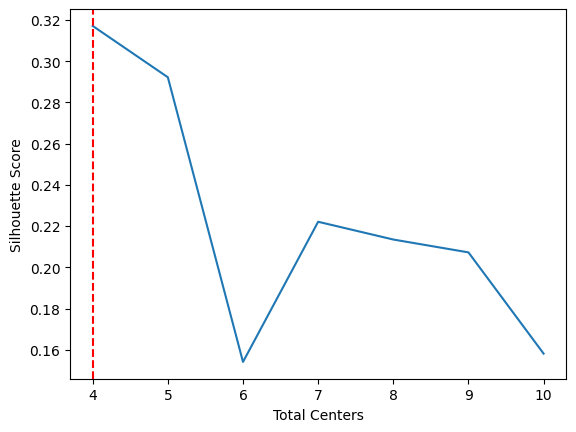

In [63]:
# Plot mean_test_scores vs. n_clusters
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Draw a vertical line, where the best model is
plt.axvline(
    x=best_km.n_clusters, 
    color='red',
    ls='--')

# Adds labels to the plot
plt.xlabel('Total Centers')
plt.ylabel('Silhouette Score')

We can see from this graph it's indicating the 3 or 4 total centers/clusters would be the optimal number as it starts to drop off after that point. 4 is what the line is pointing at and is a score almost at 0.5 which indicates it's reasonable. I also think 3 is reasonable given it's betwee 0.45 and 0.5. 

## Visualize the Best Model
Code below creates a visualization of the clusters stored in the optimum model `best_km`.

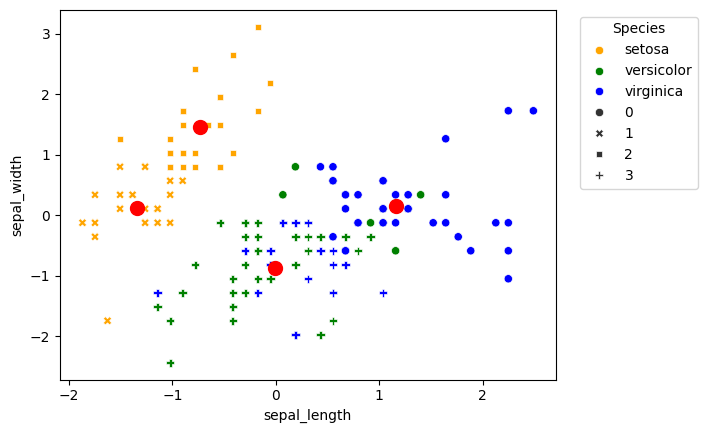

In [64]:
# Creates a scatter plot
sns.scatterplot(
    x='sepal_length', 
    y='sepal_width',
    data=df, 
    hue = species,
    style=best_km.labels_,
    palette=['orange', 'green', 'blue'])

# Adds cluster centers to the same plot
plt.scatter(
    best_km.cluster_centers_[:, 0],
    best_km.cluster_centers_[:, 1],
    marker='o',
    s=100,
    c='red')

plt.legend(
    title='Species',
    bbox_to_anchor=(1.3, 1.0))


Looking at this and plotting it base on the optimal number of 4, i think it's worse than 3 clusters. The extra point on Setosa species feels unnecessary.

In [65]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y_predicted

/Users/denisechan/Documents/Makers/Data_Engineering/Week_2/Challenge/stats_challenge_5/stats-challenge-5/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [66]:
df["cluster"]=y_predicted

In [67]:
df

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,-0.900681,1.032057,-1.341272,-1.312977,3
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,3
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,1
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


In [68]:
df['cluster'].unique()

array([3, 0, 2, 1], dtype=int32)